<a href="https://colab.research.google.com/github/Iveynganga/MACHINE-LEARNING-2/blob/main/Week3Time_SeriesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load Dataset

In [ ]:
df = pd.read_csv("/content/AEP_hourly.csv")

df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


# 2. Convert the Datetime column

Converting the datetime column from string format to datetime objects allows for easier manipulation and analysis of date and time-related data.

In [ ]:
df = pd.read_csv("/content/AEP_hourly.csv")

# Convert 'Datetime' column to datetime objects without specifying the format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Display the DataFrame
print(df)


                  Datetime   AEP_MW
0      2004-12-31 01:00:00  13478.0
1      2004-12-31 02:00:00  12865.0
2      2004-12-31 03:00:00  12577.0
3      2004-12-31 04:00:00  12517.0
4      2004-12-31 05:00:00  12670.0
...                    ...      ...
121268 2018-01-01 20:00:00  21089.0
121269 2018-01-01 21:00:00  20999.0
121270 2018-01-01 22:00:00  20820.0
121271 2018-01-01 23:00:00  20415.0
121272 2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  121273 non-null  datetime64[ns]
 1   AEP_MW    121273 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 MB


# 3. Data Preprocessing

This step handles missing values and ensures that any gaps in the data are filled with meaningful values. It also handles outliers, sets an appropriate temporal resolution and splits the dataset into training and testing sets. These steps are necessary to prepare the data for feature engineering and model training

In [ ]:
# Load the dataset
df = pd.read_csv('/content/AEP_hourly.csv')

# Parse datetime column
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Rename the column to remove any trailing spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Verify column names
print(df.columns)

# Handle missing values
df = df.fillna(method='ffill').fillna(method='bfill')

# Handle outliers
q1 = df['AEP_MW'].quantile(0.25)
q3 = df['AEP_MW'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['AEP_MW'] >= lower_bound) & (df['AEP_MW'] <= upper_bound)]

# Choose temporal resolution
df = df.set_index('Datetime').resample('D').mean().reset_index()  # Daily aggregation

# Split dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

print(df.head())



Index(['Datetime', 'AEP_MW'], dtype='object')
    Datetime        AEP_MW
0 2004-10-01  14284.521739
1 2004-10-02  12999.875000
2 2004-10-03  12227.083333
3 2004-10-04  14309.041667
4 2004-10-05  14439.708333


# 4. Feature Engineering

Feature engineering is crucial for improving the performance of machine learning models, especially for time series forecasting tasks like predicting air quality levels. By engineering the features, we provide the model with additional relevant information, enhancing its predictive power and ability to capture underlying patterns in the data.

In [ ]:
# Feature Engineering
df['day_of_week'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['year'] = df['Datetime'].dt.year

# Lag features (previous values)
df['lag_1'] = df['AEP_MW'].shift(1)
df['lag_7'] = df['AEP_MW'].shift(7)

# Rolling window features
df['rolling_mean_7'] = df['AEP_MW'].rolling(window=7).mean()
df['rolling_std_7'] = df['AEP_MW'].rolling(window=7).std()

# Drop any rows with missing values generated by the shift() and rolling() methods
df.dropna(inplace=True)

# Split dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

train_df.head()
test_df.head()

,Datetime,AEP_MW,AEP_MW_lag_1,AEP_MW_lag_2,AEP_MW_lag_3,AEP_MW_lag_4,AEP_MW_lag_5,AEP_MW_lag_6,AEP_MW_lag_7,AEP_MW_MA_7,day_of_week,month,day,year,lag_1,lag_7,rolling_mean_7,rolling_std_7
4046,2015-10-30,13729.291667,13321.541667,13596.416667,13877.291667,13260.958333,11402.541667,11841.041667,13017.750000,13004.154762,4,10,30,2015,13321.541667,13017.750000,13004.154762,976.698934
4047,2015-10-31,12783.916667,13729.291667,13321.541667,13596.416667,13877.291667,13260.958333,11402.541667,11841.041667,13138.851190,5,10,31,2015,13729.291667,11841.041667,13138.851190,845.804913
4048,2015-11-01,11654.040000,12783.916667,13729.291667,13321.541667,13596.416667,13877.291667,13260.958333,11402.541667,13174.779524,6,11,1,2015,12783.916667,11402.541667,13174.779524,760.829952
4049,2015-11-02,13259.333333,11654.040000,12783.916667,13729.291667,13321.541667,13596.416667,13877.291667,13260.958333,13174.547381,0,11,2,2015,11654.040000,13260.958333,13174.547381,760.799522
4050,2015-11-03,13406.375000,13259.333333,11654.040000,12783.916667,13729.291667,13321.541667,13596.416667,13877.291667,13107.273571,1,11,3,2015,13259.333333,13877.291667,13107.273571,707.237540


# 5. Model Selection and Training

# Using ARIMA

The ARIMA model is trained and evaluated to ensure it accurately captures the patterns in the historical data and provides reliable future forecasts.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
train_series = train_df.set_index('Datetime')['AEP_MW']
test_series = test_df.set_index('Datetime')['AEP_MW']

arima_model = ARIMA(train_series, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast
forecast = arima_result.forecast(steps=len(test_df))
forecast = pd.Series(forecast, index=test_series.index)

# Evaluate performance
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_series, forecast))
mae = mean_absolute_error(test_series, forecast)

print(f'ARIMA RMSE: {rmse}')
print(f'ARIMA MAE: {mae}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 2505.5825385651096
ARIMA MAE: 1939.8887434931269


# Using LSTM

The step involves reshaping the data, training the LSTM model, forecasting, and evaluating its performance.

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare data for LSTM
features = ['AEP_MW', 'AEP_MW_lag_1', 'AEP_MW_lag_2', 'AEP_MW_MA_7', 'month', 'day_of_week']
target = 'AEP_MW'

# Scale the features and target separately
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale features
train_features_scaled = feature_scaler.fit_transform(train_df[features])
test_features_scaled = feature_scaler.transform(test_df[features])

# Scale target
train_target_scaled = target_scaler.fit_transform(train_df[[target]])
test_target_scaled = target_scaler.transform(test_df[[target]])

# Prepare inputs for LSTM
X_train, y_train = train_features_scaled[:, 1:], train_target_scaled
X_test, y_test = test_features_scaled[:, 1:], test_target_scaled
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Forecast
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)

# Evaluate performance
rmse_lstm = np.sqrt(mean_squared_error(test_df['AEP_MW'], y_pred))
mae_lstm = mean_absolute_error(test_df['AEP_MW'], y_pred)

print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM MAE: {mae_lstm}')


Epoch 1/50
126/126 - 3s - loss: 0.0658 - val_loss: 0.0153 - 3s/epoch - 26ms/step
Epoch 2/50
126/126 - 1s - loss: 0.0091 - val_loss: 0.0070 - 682ms/epoch - 5ms/step
Epoch 3/50
126/126 - 1s - loss: 0.0061 - val_loss: 0.0067 - 711ms/epoch - 6ms/step
Epoch 4/50
126/126 - 1s - loss: 0.0058 - val_loss: 0.0068 - 605ms/epoch - 5ms/step
Epoch 5/50
126/126 - 1s - loss: 0.0056 - val_loss: 0.0063 - 659ms/epoch - 5ms/step
Epoch 6/50
126/126 - 1s - loss: 0.0054 - val_loss: 0.0061 - 664ms/epoch - 5ms/step
Epoch 7/50
126/126 - 1s - loss: 0.0053 - val_loss: 0.0059 - 664ms/epoch - 5ms/step
Epoch 8/50
126/126 - 0s - loss: 0.0052 - val_loss: 0.0059 - 481ms/epoch - 4ms/step
Epoch 9/50
126/126 - 0s - loss: 0.0051 - val_loss: 0.0057 - 400ms/epoch - 3ms/step
Epoch 10/50
126/126 - 1s - loss: 0.0051 - val_loss: 0.0056 - 643ms/epoch - 5ms/step
Epoch 11/50
126/126 - 1s - loss: 0.0051 - val_loss: 0.0057 - 1s/epoch - 11ms/step
Epoch 12/50
126/126 - 1s - loss: 0.0051 - val_loss: 0.0056 - 592ms/epoch - 5ms/step
Epoch

# 6. Model Evaluation and Visualization

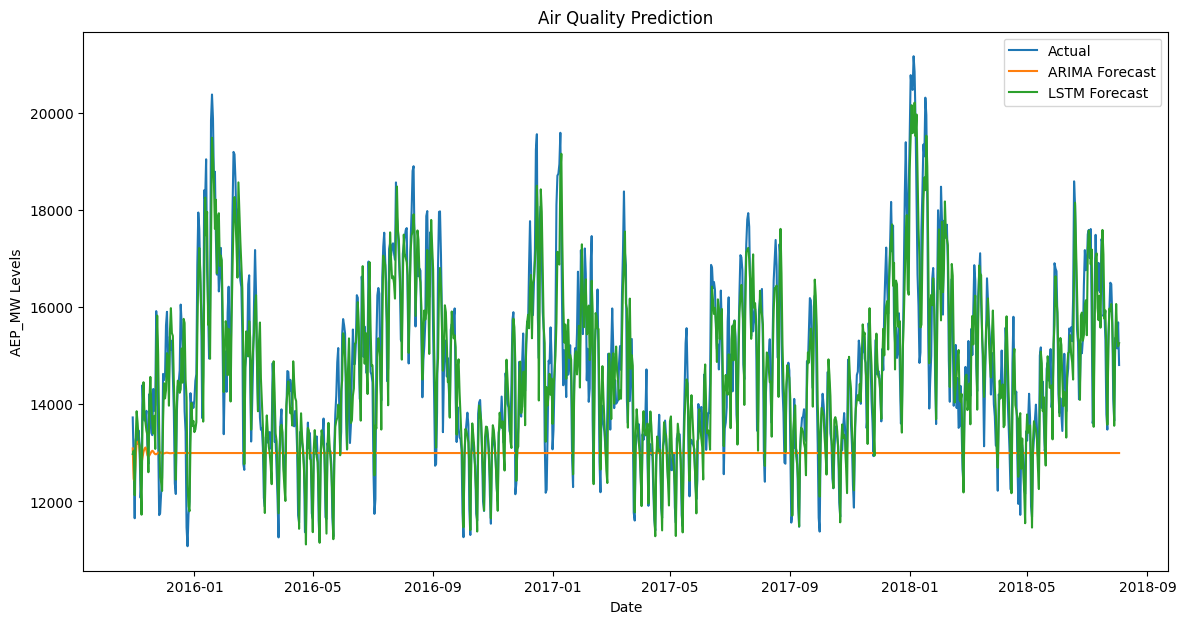

In [ ]:
# Visualization
plt.figure(figsize=(14, 7))
plt.plot(test_df['Datetime'], test_df['AEP_MW'], label='Actual')
plt.plot(test_df['Datetime'], forecast, label='ARIMA Forecast')
plt.plot(test_df['Datetime'], y_pred, label='LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('AEP_MW Levels')
plt.title('Air Quality Prediction')
plt.legend()
plt.show()